# Library scipy
https://scipy.org/
SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
https://docs.scipy.org/doc/scipy/getting_started.html#getting-started-ref
https://scipy-lectures.org/packages/statistics/index.html

## Statistics

In [2]:
from scipy import stats
from scipy.stats import norm

In [3]:
print(norm.mean(), norm.std(), norm.var())

0.0 1.0 1.0


### rv_continuous
It is a generic base class through which we can construct specific distribution sub-classes and instances for continuous random variables.

### rv_discrete
It is a generic base class through which we can construct specific distribution sub-classes and instances for discrete random variables.

### rv_histogram
We can use it to generate specific distribution histograms. It can also be inherited from the class.

### normal distribution
e import the norm function which inherits from the rv_continuous class. The functions include methods and details to work on the specific continuous distribution.

In [4]:
from scipy.stats import norm
import numpy as np
a=np.array([2,-1,4,1,3,0])
print(norm.cdf(a))

[0.97724987 0.15865525 0.99996833 0.84134475 0.9986501  0.5       ]


In [6]:
#median of the distribution using the Percent Point Function. PPF is actually the inverse value of CDF.
a=np.array([0.97724987,0.15865525,0.99996833, 0.84134475, 0.9986501,0.5])
print(norm.ppf(a))

[ 2.00000004 -1.00000002  4.00000928  1.00000002  2.99999956  0.        ]


### uniform distribution
generate a uniform distribution. We need to import the uniform function and then generate the CDF of the array.

We can increase the functionality with the use of scale and loc keyword. The scale keyword defines the standard deviation and the loc defines the mean value.

In [7]:
from scipy.stats import uniform
a=np.array([9,8,7,3,2])
print (uniform.cdf(a, loc =5 , scale = 3))

[1.         1.         0.66666667 0.         0.        ]


### binomial distribution
binomial distribution by importing binom the instance of rv_discrete class. It consists of methods and details from class.

In [9]:
from scipy.stats import binom
a=np.array([9,8,7,3,2])
print (binom.cdf(a,n=2,p=5))

[nan nan nan nan nan]


## Descriptive Stats
describe()- it returns descriptive stats of the arrays
gmean()- it returns the geometric mean along a specific axis of an array
hmean()- it returns the harmonic mean along a specific axis of an array
sem()- it returns the standard error mean of the mean
kurtosis()- it returns the kurtosis value of an array
mode()- it returns the mode of an array
skew()- it is to perform the skew test on an array
zscore()- it returns the z-score relative to the mean and standard deviation values.

## t-test
T-test to evaluate the difference between the mean (average) values of two arrays. We consider the value of T-Test as a significant difference in the two data
T-score is the concept of relativity. We compute the ratio between the two sets of data. The T-score value describes the difference in arrays. The smaller the value, the more similar are the arrays and vice versa.
The two data sets for comparison can be of any type. The two arrays can even follow dissimilar distribution patterns.

In [12]:
from scipy import stats  
a = stats.norm.rvs(loc = 2, scale = 1, size = (10,5))  
print(a)
print('\n', np.mean(a))

[[2.44264643 3.15065584 2.17193836 2.83590729 2.61025881]
 [2.09696462 2.70022268 2.18521649 2.54908343 0.2966261 ]
 [2.07779555 1.63314015 0.7056678  2.94516115 1.72083589]
 [2.34547063 2.67445926 1.61368624 1.4459787  1.54748034]
 [3.08482571 1.28436358 3.64655909 2.83956942 0.81076734]
 [2.28499109 2.90384502 2.15629498 2.67203837 1.78586881]
 [2.10092026 2.9787201  2.28714921 2.51658885 4.00649905]
 [0.69901353 3.10475371 1.35964539 2.77262416 1.60446783]
 [1.15193122 1.94129079 1.39863512 1.69804809 2.47935717]
 [1.71800846 2.01290789 0.96473856 1.6256853  1.16810331]]

 2.0961481427506365


In [ ]:
print(stats.ttest_1samp(a, 2.0)) 

## Example
https://scipy-lectures.org/_downloads/brain_size.csv

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
dlink = 'https://scipy-lectures.org/_downloads/brain_size.csv'
data = pd.read_csv(dlink, sep=';', na_values='.')

In [14]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [15]:
data.shape

(40, 8)

In [16]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [17]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [18]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


<AxesSubplot:xlabel='Weight', ylabel='Height'>

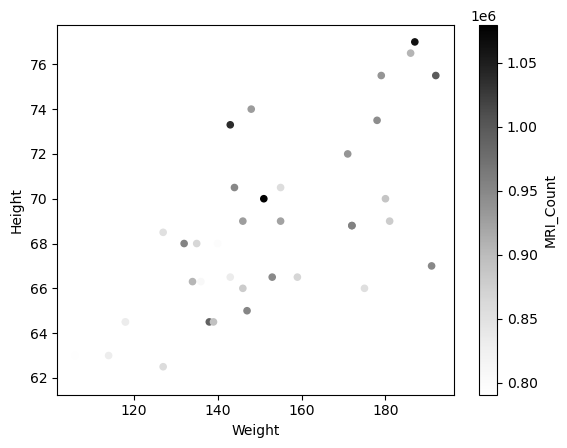

In [29]:
#from pandas.tools.plotting import scatter_matrix
data.plot.scatter(x='Weight', y='Height', c='MRI_Count') 

In [31]:
#1-sample t-test: testing the value of a population mean
stats.ttest_1samp(data['VIQ'], 0) 
#tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn 
#from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value
#With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.
https://scipy-lectures.org/packages/statistics/index.html

Ttest_1sampResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28)

#2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different.
To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [32]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217)